In [179]:
import random
import conf
import importlib

importlib.reload(conf)
from conf import *

In [180]:
p = {"beta": 10, "J": 1, "L": 2}
k = Wolrdline(**p)

In [181]:
k.add_kinks(0, 1, [-1, 1])
k.add_kinks(0, 9, [1, -1])
k.add_kinks(1, 4, [-1, 1])
k.add_kinks(1, 5, [1, -1])
print(k.kinks)

[[kink(tau=1, spin=[-1, 1]), kink(tau=9, spin=[1, -1])], [kink(tau=4, spin=[-1, 1]), kink(tau=5, spin=[1, -1])]]


In [184]:
k.get_ups()

[[[4, 5], [0, 1], [9, 10]], [[1, 4], [5, 9]]]

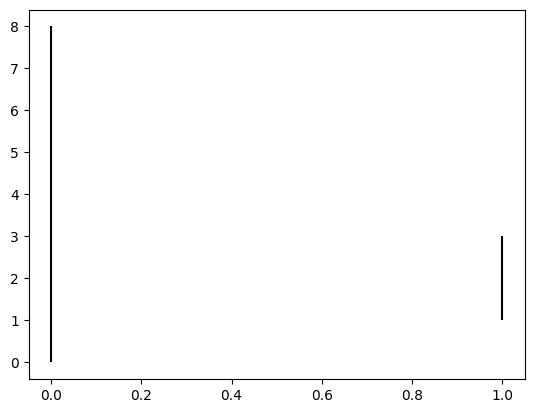

In [188]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.vlines([0, 1], [0, 1], [8, 3], color="black")